In [49]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X, y = mnist["data"], mnist['target']
y = y.astype(np.uint8)

In [51]:
Nsplit = 60000
X_train, X_test, y_train, y_test = X[:Nsplit], X[Nsplit:], y[:Nsplit], y[Nsplit:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

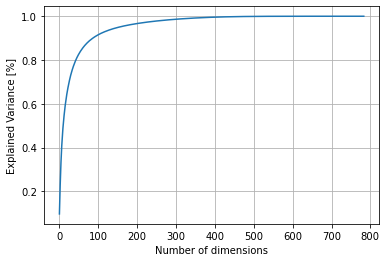

In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance [%]')
plt.xlabel('Number of dimensions')
plt.grid()

In [70]:
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_t = pca.transform(X_train)
X_test_t = pca.transform(X_test)

In [71]:
X_train_t.shape

(60000, 50)

In [72]:
from sklearn.ensemble import RandomForestClassifier
import time

clf = RandomForestClassifier(max_depth=1)

n_dim = 100

start = time.time()
clf.fit(X_train_t,y_train_5)
end = time.time()
print('Time elapsed is {:4.2f} seconds',end-start)

p = clf.predict(X_test_t)

n_correct = sum(p==y_test_5)
print('Percent correct = {:4.2f}%'.format(100*n_correct/len(y_test)))



Time elapsed is {:4.2f} seconds 3.702139139175415
Percent correct = 91.08%


In [75]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_t,y_train_5)

p = sgd_clf.predict(X_test_t)
n_correct = sum(p==y_test_5)
print('Percent correct = {:4.2f}%'.format(100*n_correct/len(y_test)))

Percent correct = 95.50%


In [76]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier()
mlp_clf.fit(X_train_t,y_train_5)

p = mlp_clf.predict(X_test_t)
n_correct = sum(p==y_test_5)
print('Percent correct = {:4.2f}%'.format(100*n_correct/len(y_test)))

Percent correct = 99.44%


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("pca", PCA(n_components=50)),
    ("mlp_clf", MLPClassifier())
])

start = time.time()
clf.fit(X_train, y_train_5)
end = time.time()
print('Time elapsed is {:4.2f} seconds',end-start)


Time elapsed is {:4.2f} seconds 20.90315341949463


In [82]:
p = clf.predict(X_test)
n_correct = sum(p==y_test_5)
print('Percent correct = {:4.2f}%'.format(100*n_correct/len(y_test)))

Percent correct = 99.52%


In [85]:
# Keys for potential grid search
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'mlp_clf', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'mlp_clf__activation', 'mlp_clf__alpha', 'mlp_clf__batch_size', 'mlp_clf__beta_1', 'mlp_clf__beta_2', 'mlp_clf__early_stopping', 'mlp_clf__epsilon', 'mlp_clf__hidden_layer_sizes', 'mlp_clf__learning_rate', 'mlp_clf__learning_rate_init', 'mlp_clf__max_fun', 'mlp_clf__max_iter', 'mlp_clf__momentum', 'mlp_clf__n_iter_no_change', 'mlp_clf__nesterovs_momentum', 'mlp_clf__power_t', 'mlp_clf__random_state', 'mlp_clf__shuffle', 'mlp_clf__solver', 'mlp_clf__tol', 'mlp_clf__validation_fraction', 'mlp_clf__verbose', 'mlp_clf__warm_start'])

In [86]:
# Grid search
param_grid = [{
    "mlp_clf__hidden_layer_sizes": [25, 50, 100],
    "mlp_clf__activation": ['relu','tanh']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)

start = time.time()
grid_search.fit(X_train, y_train_5)
end = time.time()
print('Time elapsed is {:4.2f} seconds',end-start)

Time elapsed is {:4.2f} seconds 303.2630383968353


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("pca", PCA(n_components=100)),
    ("log_clf", RandomForestClassifier())
])

clf.fit(X_train, y_train_5)

Pipeline(steps=[('pca', PCA(n_components=100)),
                ('log_clf', RandomForestClassifier())])

In [39]:
y_train[0]

'5'

In [48]:
p = clf.predict(X_train)
n_correct = sum(p==y_test_5)
print('Percent correct = {:4.2f}%'.format(100*n_correct/len(y_test)))

<ipython-input-48-bc8fc5a1128b>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  n_correct = sum(p==y_test_5)


TypeError: 'bool' object is not iterable

In [ ]:

param_grid = [{
    
}]